# Sanity Checking the Subspace Network Digital Twin

This notebook performs an simulation run that uses the default parameter set
for a single run. It is meant to provide quick diagnostics on the model
capabilities

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import os
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "png"

In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
# %%
from subspace_model.params import INITIAL_STATE
from subspace_model.params import SINGLE_RUN_PARAMS
from subspace_model.params import TIMESTEPS
from subspace_model.params import SAMPLES


from subspace_model.structure import SUBSPACE_MODEL_BLOCKS
from cadCAD_tools import easy_run

default_run_args = (INITIAL_STATE,
                     {k: [v] for k, v in SINGLE_RUN_PARAMS.items()},
                    SUBSPACE_MODEL_BLOCKS,
                    TIMESTEPS,
                    SAMPLES)
sim_df = easy_run(*default_run_args)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 701, 37, 1, 29)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (701, 37, 1, 29)


Initializing configurations:   0%|          | 0/1 [00:00<?, ?it/s]

Execution Method: local_simulations
Execution Mode: single_threaded


Flattening results:   0%|          | 0/8413 [00:00<?, ?it/s]

Total execution time: 0.49s


In [3]:
sim_df.head(5)

,days_passed,delta_days,circulating_supply,user_supply,issued_supply,sum_of_stocks,dsf_relative_disbursal_per_day,reward_issuance_balance,other_issuance_balance,operators_balance,...,avg_compute_units_per_tx,std_compute_units_per_tx,min_compute_units_per_tx,avg_transaction_size,std_transaction_size,min_transaction_size,avg_transaction_count,avg_slash_per_day,avg_new_sectors_per_day,std_new_sectors_per_day
0,0,0,NaN,NaN,NaN,NaN,0.0,1.320000e+09,1.680000e+09,0.000000e+00,...,1000,1000,10,1000,5000,100,30,1,700,200
12,1,1,26400000.0,NaN,NaN,3.000000e+09,0.0,1.293600e+09,1.680000e+09,0.000000e+00,...,1000,1000,10,1000,5000,100,30,1,700,200
24,2,1,52272000.0,NaN,NaN,3.000000e+09,0.0,1.267728e+09,1.680000e+09,8.518581e+05,...,1000,1000,10,1000,5000,100,30,1,700,200
36,3,1,77626560.0,NaN,NaN,3.000000e+09,0.0,1.242373e+09,1.680000e+09,2.237118e+06,...,1000,1000,10,1000,5000,100,30,1,700,200
48,4,1,102474028.8,NaN,NaN,3.000000e+09,0.0,1.217526e+09,1.680000e+09,3.889353e+06,...,1000,1000,10,1000,5000,100,30,1,700,200


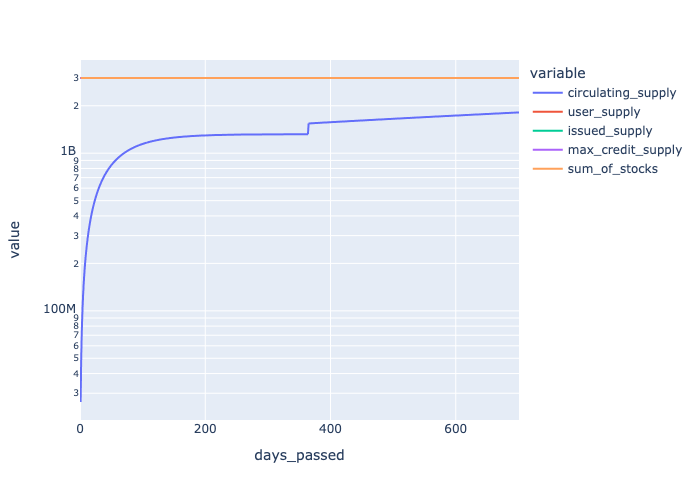

In [4]:
px.line(sim_df, 
        x='days_passed', 
        y=[el for el in sim_df.columns if "supply" in el] + ['sum_of_stocks'],
        log_y=True)

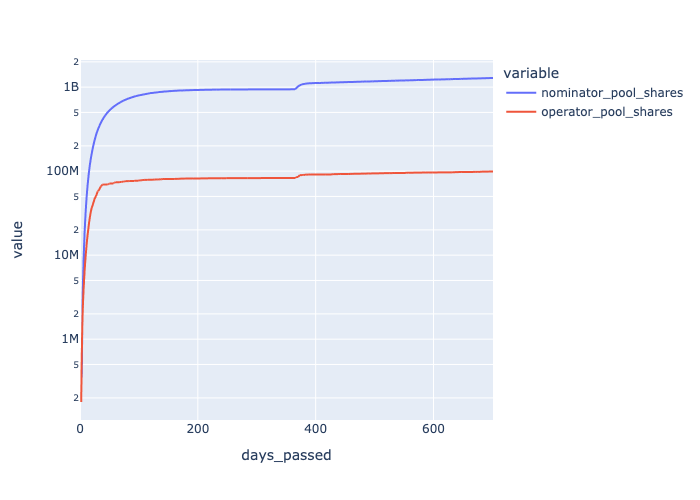

In [5]:
px.line(sim_df, x='days_passed', 
        y=[el for el in sim_df.columns if "shares" in el],
        log_y=True)

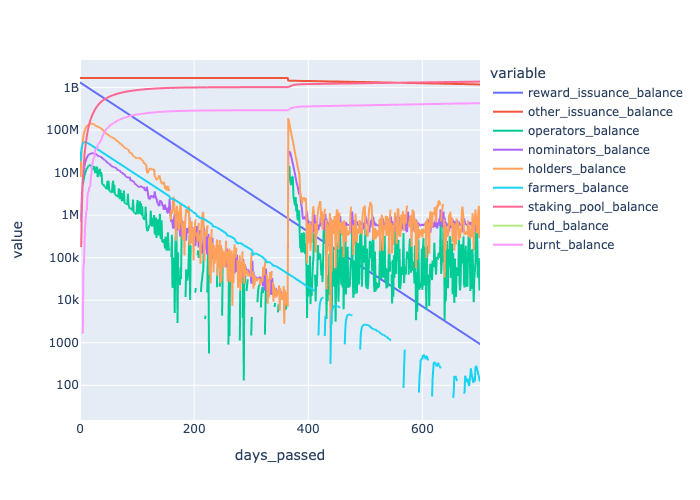

In [6]:
px.line(sim_df, x='days_passed', 
        y=[el for el in sim_df.columns if "_balance" in el],
        log_y=True)

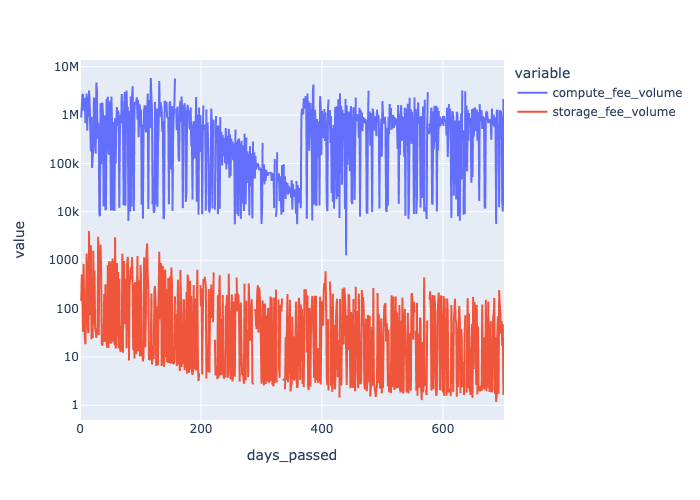

In [7]:
px.line(sim_df, 
        x='days_passed', 
        y=[el for el in sim_df.columns if "volume" in el],
        log_y=True)

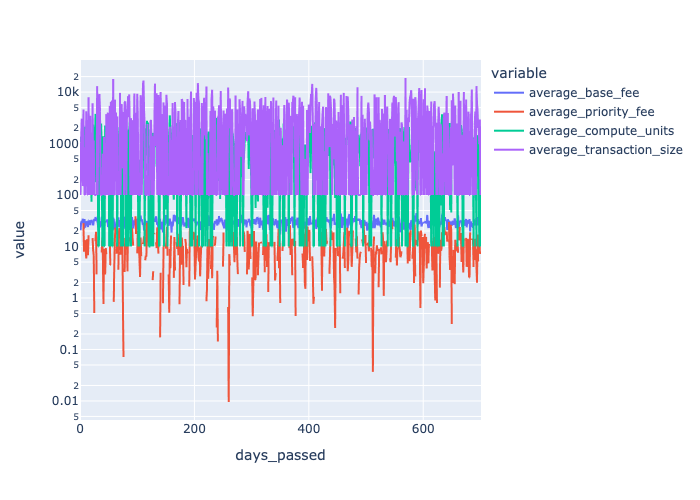

In [8]:
fig = px.line(sim_df, 
        x='days_passed', 
        y=[el for el in sim_df.columns if "average" in el],
        log_y=True)
fig.show()

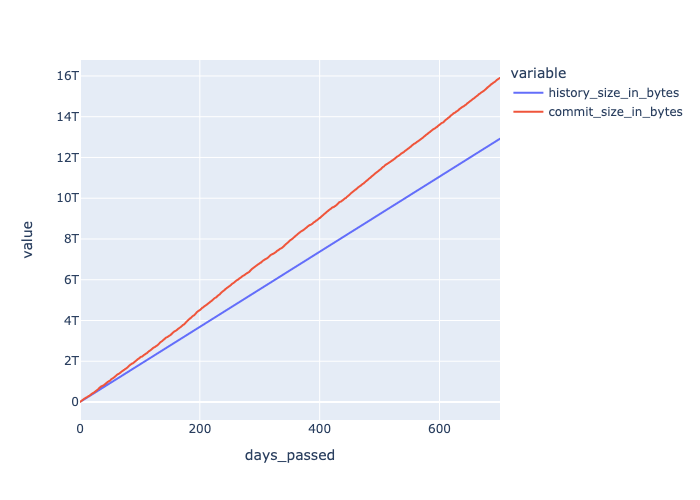

In [9]:
fig = px.line(sim_df, 
        x='days_passed', 
        y=['history_size_in_bytes', 'commit_size_in_bytes'])
fig.show()